# RQ1: Does a developer's choice of platform influence how well his apps are received?

__Purpose__

This notebook's purpose is to answer the first research question. In this notebook we use each app's rating to evaluate how well it is received. We will compare the mean value of each developer's apps' ratings that are from different platforms.

In [1]:
import math
import pandas as pd
import numpy as np

from matplotlib.pylab import plt
import seaborn as sns

import scipy.stats as stats

from os.path import exists, isfile

# Load dataset

In [2]:
if not exists("../../datasets/2400_combine_developer_datasets.csv"):
    print ("Missing dataset file")
    
df=pd.read_csv("../../datasets/2400_combine_developer_datasets.csv")
df.head()

,apple_rating,google_rating,normed_apple_rating,normed_google_rating,apple_revenue,google_revenue,z_score_apple_rating,z_score_google_rating,app_num,log_google_reviews,log_apple_reviews,google_reviews,apple_reviews
0,4.0,4.4,0.8,0.88,0.00,0.00,-0.083987,0.449144,1,6.065666,3.322012,1163232.0,2099.0
1,4.0,4.5,0.8,0.90,0.00,0.00,-0.083987,0.646570,1,4.906755,2.754348,80678.0,568.0
2,4.0,4.2,0.8,0.84,28521.45,137382.48,-0.083987,0.054292,1,4.138366,3.455606,13752.0,2855.0
3,3.5,4.2,0.7,0.84,0.00,0.00,-0.806018,0.054292,1,4.878206,4.222274,75545.0,16683.0
4,4.5,4.6,0.9,0.92,0.00,0.00,0.638043,0.843996,1,5.823814,3.994713,666521.0,9879.0


In [3]:
result_dir = '../../results/'

# Normalized Ratings

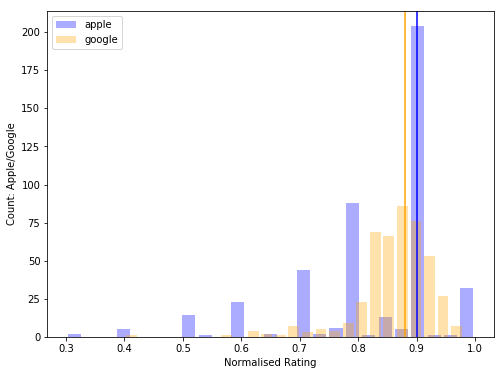

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

df['normed_apple_rating'].hist(ax=ax, rwidth=.8, alpha=.33, bins=25, label='apple', color='blue')
df['normed_google_rating'].hist(ax=ax, rwidth=.8, alpha=.33, bins=25, label='google', color='orange')

apple_median = df['normed_apple_rating'].median()
google_median = df['normed_google_rating'].median()

ax.axvline(apple_median, c='blue')
ax.axvline(google_median, c='orange')

ax.grid(False)
ax.set_xlabel('Normalised Rating')
ax.set_ylabel('Count: Apple/Google')
ax.legend()

This histogram shows the difference between google and apple ratings. Since the median value of apple ratings is actually higher than that of google ratings, we can get the conclusion that apple ratings are skewed more towards higher ratings compared with apps' google ratings.

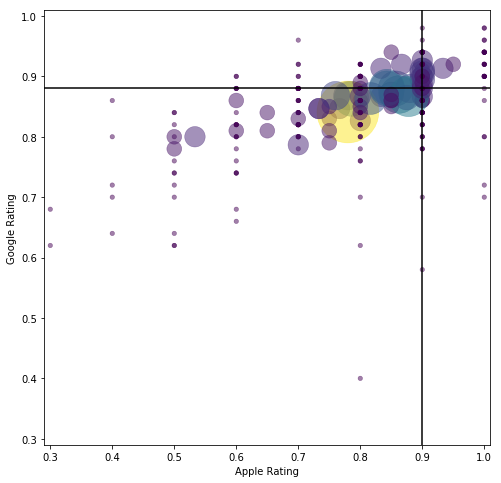

In [5]:
fig,ax = plt.subplots(figsize = (8,8))

x = df['normed_apple_rating']
y = df['normed_google_rating']
z = df['app_num']
ax.scatter(x, y , s = (z - np.min(z) + 0.1) * 200, c = z, linewidth = 0.5, alpha = 0.5)

ax.axhline(google_median, c='k')
ax.axvline(apple_median, c='k')

ax.set_xlim(0.29, 1.01)
ax.set_ylim(0.29, 1.01)

ax.set_xlabel('Apple Rating')
ax.set_ylabel('Google Rating')

plt.savefig(result_dir + 'google_rating_vs_apple_rating_normed_ratings_graph.png')
with open(result_dir + 'google_rating_vs_apple_rating_normed_ratings_description.txt', 'w') as f:
    f.write('Google ratings vs apple ratings using normalised ratings (0–1 scale).')

We compared apps' google ratings and apple ratings by a scatterplot. We use different colors to make each circle clear. We use the size of each circle to encode the number of represented apps. Because in the upper left part of this plot there are more and larger circles, it seems that more apps have higher normalized ratings on google play.

# Z Score

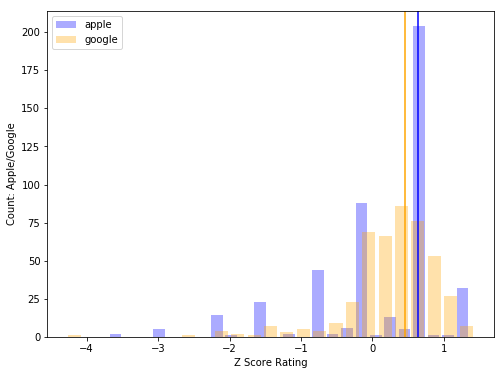

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

df['z_score_apple_rating'].hist(ax=ax, rwidth=.8, alpha=.33, bins=25, label='apple', color='blue')
df['z_score_google_rating'].hist(ax=ax, rwidth=.8, alpha=.33, bins=25, label='google', color='orange')

apple_median = df['z_score_apple_rating'].median()
google_median = df['z_score_google_rating'].median()

ax.axvline(apple_median, c='blue')
ax.axvline(google_median, c='orange')

ax.grid(False)
ax.set_xlabel('Z Score Rating')
ax.set_ylabel('Count: Apple/Google')
ax.legend()

This histogram shows the difference between google and apple ratings (z score). Since the median value of apple ratings is actually higher than that of google ratings, we can get the conclusion that apple ratings are skewed more towards higher ratings compared with apps' google ratings.

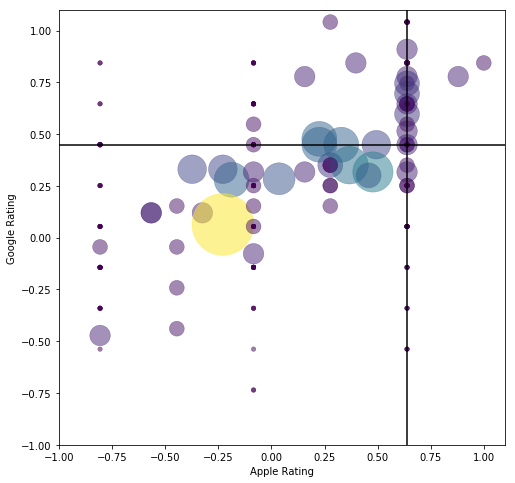

In [7]:
fig,ax = plt.subplots(figsize = (8,8))

x = df['z_score_apple_rating']
y = df['z_score_google_rating']
z = df['app_num']
ax.scatter(x, y , s = (z - np.min(z) + 0.1) * 200, c = z, linewidth = 0.5, alpha = 0.5)

ax.axhline(google_median, c='k')
ax.axvline(apple_median, c='k')

ax.set_xlim(-1, 1.1)
ax.set_ylim(-1, 1.1)

ax.set_xlabel('Apple Rating')
ax.set_ylabel('Google Rating')

plt.savefig(result_dir + 'google_rating_vs_apple_rating_z_score_ratings_graph.png')
with open(result_dir + 'google_rating_vs_apple_rating_z_score_ratings_description.txt', 'w') as f:
    f.write('Google ratings vs apple ratings using z-score ratings (0–1 scale).')

Still, in the upper left part of this plot there are more and larger circles. In the following chart we will see if it is true that more apps have higher normalized ratings on google play.

# What fraction of apps get higher ratings on Google Play, or on Apple Store?

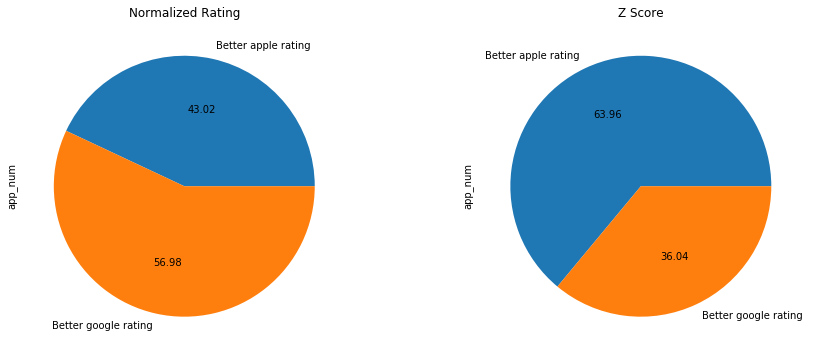

In [8]:
fig, (ax, bx) = plt.subplots(1,2,figsize=(15, 6))

df['google_norm_better_than_apple'] = df['normed_google_rating'] > df['normed_apple_rating']
df['google_norm_better_than_apple'].replace({False: 'Better apple rating', True: 'Better google rating'}, inplace=True)
fraction = df.groupby('google_norm_better_than_apple').count()
fraction['app_num'].plot.pie(autopct='%.2f', fontsize=10, ax = ax)

ax.set_title("Normalized Rating")

df['google_z_score_better_than_apple'] = df['z_score_apple_rating'] > df['z_score_google_rating']
df['google_z_score_better_than_apple'].replace({False: 'Better apple rating', True: 'Better google rating'}, inplace=True)
fraction = df.groupby('google_z_score_better_than_apple').count()
fraction['app_num'].plot.pie(autopct='%.2f', fontsize=10, ax = bx)

bx.set_title("Z Score")

plt.savefig(result_dir + 'fraction_rating_diffs_graph.png')
with open(result_dir + 'frac_rating_diffs_description.txt', 'w') as f:
    f.write('Google ratings vs apple ratings using fractions (0–1 scale).')

When we look into the first chart, we see that more developers actually get higher ratings when they release their apps on Google Play. However, when we compare the z-score ratings of those apps, things are different. We see that more developers get higher ratings on Apple Store.

# One-sided T-test

In [9]:
stats.levene(df['normed_google_rating'], df['normed_apple_rating'])

LeveneResult(statistic=61.384013063147094, pvalue=1.3416533917045439e-14)

Since the p-value is very small, we should say that our samples obviously do not have equal variances.

In [10]:
stats.ttest_ind(df['normed_google_rating'], df['normed_apple_rating'], equal_var = False)

Ttest_indResult(statistic=5.788859405155191, pvalue=1.1010368070190355e-08)

Our H0 is that normalized apple ratings are better than or equal to normalized google ratings. However, p-value/2 is far less than 0.05, so we should reject this hypothesis.

In [11]:
stats.levene(df['z_score_apple_rating'], df['z_score_google_rating'])

LeveneResult(statistic=24.228817375504615, pvalue=1.0200043896067972e-06)

In [12]:
stats.ttest_ind(df['z_score_google_rating'], df['z_score_apple_rating'], equal_var = False)

Ttest_indResult(statistic=3.6832187070907, pvalue=0.00024611141062602117)

Our H0 is that z-score apple ratings are better than or equal to z-score google ratings. However, p-value/2 is far less than 0.05, so we should reject this hypothesis.